In [ ]:
import pandas as pd
from pandas.io.json import json_normalize
import json
competitions = pd.read_json("/content/drive/My Drive/bachelor data/teams.json")
with open('/content/drive/My Drive/bachelor data/events/events_Spain.json') as f:
    d = json.load(f)
eventsSpain = pd.read_json('/content/drive/My Drive/bachelor data/events/events_Spain.json')
matchesSpain = pd.read_json("/content/drive/My Drive/bachelor data/matches/matches_Spain.json")
players = pd.read_json("/content/drive/My Drive/bachelor data/players.json")
tagsName = pd.read_csv("/content/drive/My Drive/bachelor data/tags2name.csv")
teams = pd.read_json("/content/drive/My Drive/bachelor data/teams.json")
tags = json_normalize(data=d, record_path='tags', meta=['id'], record_prefix='_')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if sys.path[0] == '':


In [ ]:
teams[teams['city'] == 'Madrid']

,city,name,wyId,officialName,area,type
10,Madrid,Atl\u00e9tico Madrid,679,Club Atl\u00e9tico de Madrid,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
14,Madrid,Real Madrid,675,Real Madrid Club de F\u00fatbol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club


In [ ]:
result = pd.merge(players,
                 eventsSpain,
                 left_on=['wyId'],
                 right_on=['playerId'])
playerEvents = result[['shortName', 'role', 'currentTeamId', 'teamId', 'playerId', 'eventId', 'eventName', 'eventSec', 'subEventId', 'subEventName', 'positions', 'matchId', 'matchPeriod', 'tags', 'id']]
playerEvents.head(1)

,shortName,role,currentTeamId,teamId,playerId,eventId,eventName,eventSec,subEventId,subEventName,positions,matchId,matchPeriod,tags,id
0,A. N'Diaye,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",683,682,32793,1,Duel,2161.34542,13,Ground loose ball duel,"[{'y': 70, 'x': 7}, {'y': 71, 'x': 8}]",2565548,2H,"[{'id': 1601}, {'id': 701}, {'id': 1802}]",180865812


In [ ]:
result2 = pd.merge(playerEvents,
                   matchesSpain,
                   left_on=['matchId'],
                   right_on=['wyId'])
playerEventsMatches = result2[['shortName', 'role', 'currentTeamId','teamId', 'playerId', 'eventId', 'eventName', 'eventSec', 'subEventId', 'subEventName', 'positions', 'tags', 'id', 'matchId', 'matchPeriod', 'gameweek']]
playerEventsMatches.head(1)

,shortName,role,currentTeamId,teamId,playerId,eventId,eventName,eventSec,subEventId,subEventName,positions,tags,id,matchId,matchPeriod,gameweek
0,A. N'Diaye,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",683,682,32793,1,Duel,2161.34542,13,Ground loose ball duel,"[{'y': 70, 'x': 7}, {'y': 71, 'x': 8}]","[{'id': 1601}, {'id': 701}, {'id': 1802}]",180865812,2565548,2H,1


In [ ]:
playerPassMatches = pd.merge(playerEventsMatches,
                                     tags,
                                     on='id')
playerSuccessfulPassMatches = playerPassMatches[(playerPassMatches['_id'] == 1801) & (playerPassMatches['eventName'] == 'Pass')]
playerSuccessfulPassMatches.head(1)

,shortName,role,currentTeamId,teamId,playerId,eventId,eventName,eventSec,subEventId,subEventName,positions,tags,id,matchId,matchPeriod,gameweek,_id
3,A. N'Diaye,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",683,682,32793,8,Pass,2220.191895,85,Simple pass,"[{'y': 59, 'x': 42}, {'y': 47, 'x': 13}]",[{'id': 1801}],180865823,2565548,2H,1,1801


In [ ]:
playerPassMatch = playerPassMatches.loc[(playerPassMatches['matchId'] == 2565830) & (playerPassMatches['eventName'] == 'Pass') & (playerPassMatches['teamId'] == 676)]
playerPassMatch.head(1)

,shortName,role,currentTeamId,teamId,playerId,eventId,eventName,eventSec,subEventId,subEventName,positions,tags,id,matchId,matchPeriod,gameweek,_id
356183,Jordi Alba,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",676,676,3269,8,Pass,118.476911,85,Simple pass,"[{'y': 49, 'x': 47}, {'y': 65, 'x': 35}]",[{'id': 1801}],235246338,2565830,1H,29,1801


In [ ]:
playerSuccessfulPassMatch = playerSuccessfulPassMatches.loc[(playerSuccessfulPassMatches['matchId'] == 2565830) & (playerSuccessfulPassMatches['teamId'] == 676)]
playerSuccessfulPassMatch.head(1)

,shortName,role,currentTeamId,teamId,playerId,eventId,eventName,eventSec,subEventId,subEventName,positions,tags,id,matchId,matchPeriod,gameweek,_id
356183,Jordi Alba,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",676,676,3269,8,Pass,118.476911,85,Simple pass,"[{'y': 49, 'x': 47}, {'y': 65, 'x': 35}]",[{'id': 1801}],235246338,2565830,1H,29,1801


In [ ]:
playerIdPasses = playerPassMatch['playerId'].value_counts().rename_axis('playerId').to_frame('passes')
playerIdPasses.reset_index(level=0, inplace=True)
playerIdPasses.head(1)

,playerId,passes
0,25397,86


In [ ]:
playerIdPasses = playerSuccessfulPassMatch['playerId'].value_counts().rename_axis('playerId').to_frame('passes')
playerIdPasses.reset_index(level=0, inplace=True)
playerIdPasses.head(1)

,playerId,passes
0,25397,72


In [ ]:
playerIdNamesPassesMerge = pd.merge(playerIdPasses,
                               players,
                               left_on='playerId',
                               right_on='wyId')
playerIdNamesPassesRoles = playerIdNamesPassesMerge[['playerId', 'shortName', 'passes', 'role']]
playerIdNamesPassesRoles.head(1)

,playerId,shortName,passes,role
0,25397,S. Umtiti,72,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen..."


In [ ]:
matchesSpainDataId = matchesSpain[['wyId', 'teamsData']]
matchesSpainDataId.head(1)

,wyId,teamsData
0,2565922,"{'676': {'scoreET': 0, 'coachId': 92894, 'side..."


In [ ]:
myMatch = matchesSpainDataId.loc[matchesSpainDataId['wyId'] == 2565830]
myMatch.head(1)

,wyId,teamsData
93,2565830,"{'676': {'scoreET': 0, 'coachId': 92894, 'side..."


In [ ]:
json_normalize(myMatch['teamsData'][93]['676']['formation']['substitutions'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,playerIn,playerOut,minute
0,3353,286390,64
1,4256,3291,74
2,211885,3802,85


In [ ]:
teamLineupId = json_normalize(myMatch['teamsData'][93]['676']['formation']['lineup'])['playerId']
teamLineupId.head(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


0    286390
Name: playerId, dtype: int64

In [ ]:
players[players['wyId'] == 3353]

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
203,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",68,Andr\u00e9s,,Iniesta Luj\u00e1n,12804,1984-05-11,171,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Spain', 'id': '724', 'alpha3code': '...",3353,right,Iniesta,1598


In [ ]:
team = pd.merge(teamLineupId,
         playerIdNamesPassesRoles,
         on='playerId')
team.head(1)

,playerId,shortName,passes,role
0,286390,O. Demb\u00e9l\u00e9,18,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa..."


In [ ]:
teamLineup = json_normalize(matchesSpain.loc[0, :]['teamsData']['676']['formation']['lineup'])
teamLineup.head(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,playerId,ownGoals,redCards,goals,yellowCards
0,286390,0,0,null,0


In [ ]:
eventsSpain[['playerId', 'positions', 'matchId', 'id']].head(1)

,playerId,positions,matchId,id
0,3542,"[{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]",2565548,180864419


In [ ]:
def playerAveragePositions (playerId, matchId):
    player = players[players['wyId'] == playerId]
    playerEvents = pd.merge(eventsSpain,
            player,
            left_on = 'playerId',
            right_on = 'wyId')
    playerEventsMatch = playerEvents[playerEvents['matchId'] == matchId]
    playerEventsMatchPositionsJson = playerEventsMatch['positions'].sum()
    del playerEventsMatchPositionsJson[1::2]
    playerEventsMatchPositions = json_normalize(playerEventsMatchPositionsJson)
    playerEventsMatchPositionsAverage = playerEventsMatchPositions.mean(axis = 0, skipna = True) 
    playerAveragePositions = pd.DataFrame()
    playerAveragePositionsDataframe = playerAveragePositions.append(playerEventsMatchPositionsAverage, ignore_index=True)
    playerIdSeries = pd.Series([playerId])
    playerAveragePositionsDataframePlayerId = pd.concat([playerAveragePositionsDataframe, pd.DataFrame(playerIdSeries)], axis=1)
    playerAveragePositionsDataframePlayerId.rename(columns = {0:'playerId'}, inplace = True) 
    return playerAveragePositionsDataframePlayerId


In [ ]:
playerIdSeries = pd.Series([15])
playerIdSeries.rename("playerId")

0    15
Name: playerId, dtype: int64

In [ ]:
def playerAveragePositions2 (playerId, matchId):
    player = players[players['wyId'] == playerId]
    playerEvents = pd.merge(eventsSpain,
            player,
            left_on = 'playerId',
            right_on = 'wyId')
    playerEventsMatch = playerEvents[playerEvents['matchId'] == matchId]
    playerEventsMatchJson = playerEventsMatch['positions'].sum()
    del playerEventsMatchJson[1::2]
    playerEventsMatchPositions = json_normalize(playerEventsMatchJson) 
    return playerEventsMatchPositions

playerAveragePositions2(15008, 2565830).head(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # Remove the CWD from sys.path while we load stuff.


,y,x
0,68,7


In [ ]:
terStegenPositions = playerAveragePositions(15008, 2565830)
terStegenPositions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # Remove the CWD from sys.path while we load stuff.


,x,y,playerId
0,6.836364,40.0,15008


In [ ]:
albaPositions = playerAveragePositions(3269, 2565830)
albaTerStegen = pd.concat([albaPositions, terStegenPositions], axis=0)
albaTerStegen

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # Remove the CWD from sys.path while we load stuff.


,x,y,playerId
0,40.021978,18.021978,3269
0,6.836364,40.000000,15008


In [ ]:
piquePositions = playerAveragePositions(3341, 2565830)
piqueAlbaTerStegen = pd.concat([piquePositions, albaTerStegen], axis=0)
piqueAlbaTerStegen

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # Remove the CWD from sys.path while we load stuff.


,x,y,playerId
0,26.684783,69.195652,3341
0,40.021978,18.021978,3269
0,6.836364,40.000000,15008


In [ ]:
umtitiPositions = playerAveragePositions(25397, 2565830)
umtitiPiqueAlbaTerStegen = pd.concat([umtitiPositions, piqueAlbaTerStegen], axis=0)
umtitiPiqueAlbaTerStegen

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # Remove the CWD from sys.path while we load stuff.


,x,y,playerId
0,26.299065,25.448598,25397
0,26.684783,69.195652,3341
0,40.021978,18.021978,3269
0,6.836364,40.000000,15008


In [ ]:
robertoPositions = playerAveragePositions(3347, 2565830)
robertoUmtitiPiqueAlbaTerStegen = pd.concat([robertoPositions, umtitiPiqueAlbaTerStegen], axis=0)
robertoUmtitiPiqueAlbaTerStegen

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # Remove the CWD from sys.path while we load stuff.


,x,y,playerId
0,40.768421,83.789474,3347
0,26.299065,25.448598,25397
0,26.684783,69.195652,3341
0,40.021978,18.021978,3269
0,6.836364,40.000000,15008


In [ ]:
paulinhoPositions = playerAveragePositions(40550, 2565830)
paulinhoRobertoUmtitiPiqueAlbaTerStegen = pd.concat([paulinhoPositions, robertoUmtitiPiqueAlbaTerStegen], axis=0)
paulinhoRobertoUmtitiPiqueAlbaTerStegen

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # Remove the CWD from sys.path while we load stuff.


,x,y,playerId
0,48.380282,56.000000,40550
0,40.768421,83.789474,3347
0,26.299065,25.448598,25397
0,26.684783,69.195652,3341
0,40.021978,18.021978,3269
0,6.836364,40.000000,15008


In [ ]:
rakititicPositions = playerAveragePositions(3476, 2565830)
rakititicPaulinhoRobertoUmtitiPiqueAlbaTerStegen = pd.concat([rakititicPositions, paulinhoRobertoUmtitiPiqueAlbaTerStegen], axis=0)
rakititicPaulinhoRobertoUmtitiPiqueAlbaTerStegen

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # Remove the CWD from sys.path while we load stuff.


,x,y,playerId
0,37.155340,43.291262,3476
0,48.380282,56.000000,40550
0,40.768421,83.789474,3347
0,26.299065,25.448598,25397
0,26.684783,69.195652,3341
0,40.021978,18.021978,3269
0,6.836364,40.000000,15008


In [ ]:
coutinhoPositions = playerAveragePositions(3802, 2565830)
coutinhoRakititicPaulinhoRobertoUmtitiPiqueAlbaTerStegen = pd.concat([coutinhoPositions, rakititicPaulinhoRobertoUmtitiPiqueAlbaTerStegen], axis=0)
coutinhoRakititicPaulinhoRobertoUmtitiPiqueAlbaTerStegen

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # Remove the CWD from sys.path while we load stuff.


,x,y,playerId
0,60.828125,26.453125,3802
0,37.155340,43.291262,3476
0,48.380282,56.000000,40550
0,40.768421,83.789474,3347
0,26.299065,25.448598,25397
0,26.684783,69.195652,3341
0,40.021978,18.021978,3269
0,6.836364,40.000000,15008


In [ ]:
alcacerPositions = playerAveragePositions(3291, 2565830)
alcacerCoutinhoRakititicPaulinhoRobertoUmtitiPiqueAlbaTerStegen = pd.concat([alcacerPositions, coutinhoRakititicPaulinhoRobertoUmtitiPiqueAlbaTerStegen], axis=0)
alcacerCoutinhoRakititicPaulinhoRobertoUmtitiPiqueAlbaTerStegen

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # Remove the CWD from sys.path while we load stuff.


,x,y,playerId
0,55.157895,47.815789,3291
0,60.828125,26.453125,3802
0,37.155340,43.291262,3476
0,48.380282,56.000000,40550
0,40.768421,83.789474,3347
0,26.299065,25.448598,25397
0,26.684783,69.195652,3341
0,40.021978,18.021978,3269
0,6.836364,40.000000,15008


In [ ]:
messiPositions = playerAveragePositions(3359, 2565830)
messiAlcacerCoutinhoRakititicPaulinhoRobertoUmtitiPiqueAlbaTerStegen = pd.concat([messiPositions, alcacerCoutinhoRakititicPaulinhoRobertoUmtitiPiqueAlbaTerStegen], axis=0)
messiAlcacerCoutinhoRakititicPaulinhoRobertoUmtitiPiqueAlbaTerStegen

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # Remove the CWD from sys.path while we load stuff.


,x,y,playerId
0,63.762500,57.412500,3359
0,55.157895,47.815789,3291
0,60.828125,26.453125,3802
0,37.155340,43.291262,3476
0,48.380282,56.000000,40550
0,40.768421,83.789474,3347
0,26.299065,25.448598,25397
0,26.684783,69.195652,3341
0,40.021978,18.021978,3269
0,6.836364,40.000000,15008


In [ ]:
dembelePositions = playerAveragePositions(286390, 2565830)
dembeleMessiAlcacerCoutinhoRakititicPaulinhoRobertoUmtitiPiqueAlbaTerStegen = pd.concat([dembelePositions, messiAlcacerCoutinhoRakititicPaulinhoRobertoUmtitiPiqueAlbaTerStegen], axis=0)
dembeleMessiAlcacerCoutinhoRakititicPaulinhoRobertoUmtitiPiqueAlbaTerStegen

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # Remove the CWD from sys.path while we load stuff.


,x,y,playerId
0,67.055556,79.111111,286390
0,63.762500,57.412500,3359
0,55.157895,47.815789,3291
0,60.828125,26.453125,3802
0,37.155340,43.291262,3476
0,48.380282,56.000000,40550
0,40.768421,83.789474,3347
0,26.299065,25.448598,25397
0,26.684783,69.195652,3341
0,40.021978,18.021978,3269


In [ ]:
barcelonaAveragePosition = pd.merge(players,
         dembeleMessiAlcacerCoutinhoRakititicPaulinhoRobertoUmtitiPiqueAlbaTerStegen,
         left_on='wyId',
         right_on='playerId')
barcelonaAveragePosition[['shortName', 'x', 'y']]

,shortName,x,y
0,Jordi Alba,40.021978,18.021978
1,Paco Alc\u00e1cer,55.157895,47.815789
2,Sergi Roberto,40.768421,83.789474
3,L. Messi,63.762500,57.412500
4,I. Rakiti\u0107,37.155340,43.291262
5,Philippe Coutinho,60.828125,26.453125
6,Paulinho,48.380282,56.000000
7,M. ter Stegen,6.836364,40.000000
8,Piqu\u00e9,26.684783,69.195652
9,O. Demb\u00e9l\u00e9,67.055556,79.111111


In [ ]:
eventsSpain[eventsSpain['playerId'] == 3310]

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
11185,8,Simple pass,[{'id': 1801}],3310,"[{'y': 6, 'x': 55}, {'y': 9, 'x': 46}]",2565555,Pass,675,1H,19.681579,85,180468005
11195,8,Cross,"[{'id': 401}, {'id': 2101}, {'id': 1802}]",3310,"[{'y': 8, 'x': 93}, {'y': 100, 'x': 100}]",2565555,Pass,675,1H,41.043261,80,180468022
11198,3,Throw in,[{'id': 1801}],3310,"[{'y': 0, 'x': 88}, {'y': 21, 'x': 67}]",2565555,Free Kick,675,1H,48.651188,36,180468023
11203,8,Simple pass,[{'id': 1801}],3310,"[{'y': 10, 'x': 37}, {'y': 28, 'x': 40}]",2565555,Pass,675,1H,69.593401,85,180468026
11216,8,Simple pass,[{'id': 1801}],3310,"[{'y': 11, 'x': 71}, {'y': 27, 'x': 83}]",2565555,Pass,675,1H,102.320991,85,180468045
...,...,...,...,...,...,...,...,...,...,...,...,...
628577,3,Free Kick,[{'id': 1801}],3310,"[{'y': 7, 'x': 10}, {'y': 42, 'x': 31}]",2565927,Free Kick,675,2H,2686.016410,31,253302613
628592,8,Simple pass,[{'id': 1802}],3310,"[{'y': 8, 'x': 56}, {'y': 0, 'x': 56}]",2565927,Pass,675,2H,2713.765334,85,253302635
628594,3,Throw in,[{'id': 1801}],3310,"[{'y': 0, 'x': 64}, {'y': 14, 'x': 83}]",2565927,Free Kick,675,2H,2717.546911,36,253302637
628620,1,Ground defending duel,"[{'id': 504}, {'id': 702}, {'id': 1801}]",3310,"[{'y': 7, 'x': 58}, {'y': 0, 'x': 54}]",2565927,Duel,675,2H,2793.229781,12,253302666


In [ ]:
barcelonaSuccessfulPassMatch = playerSuccessfulPassMatch[playerSuccessfulPassMatch['teamId'] == 676]
barcelonaSuccessfulPassMatch.head(1)

,shortName,role,currentTeamId,teamId,playerId,eventId,eventName,eventSec,subEventId,subEventName,positions,tags,id,matchId,matchPeriod,gameweek,_id
356183,Jordi Alba,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",676,676,3269,8,Pass,118.476911,85,Simple pass,"[{'y': 49, 'x': 47}, {'y': 65, 'x': 35}]",[{'id': 1801}],235246338,2565830,1H,29,1801


In [ ]:
test = barcelonaSuccessfulPassMatch[['shortName',  'eventSec', 'positions']]
test.reset_index(drop=True, inplace=True)
test.head(1)

,shortName,eventSec,positions
0,Jordi Alba,118.476911,"[{'y': 49, 'x': 47}, {'y': 65, 'x': 35}]"


In [ ]:
barcelonaSuccessfulPassMatchPositions = barcelonaSuccessfulPassMatch['positions'].sum()
del barcelonaSuccessfulPassMatchPositions[0::2]
barcelonaSuccessfulPassMatchPositions
x = pd.Series(barcelonaSuccessfulPassMatchPositions)
playerNamePositionsRecepient = pd.concat([test, pd.DataFrame(x)], axis=1)
playerNamePositionsRecepient.rename(columns = {0:'Recepient'}, inplace = True) 
playerNameRecepient = playerNamePositionsRecepient.drop(['positions'], axis=1)
playerNameRecepient.head(1)

,shortName,eventSec,Recepient
0,Jordi Alba,118.476911,"{'y': 65, 'x': 35}"


In [ ]:
barcelonaSuccessfulPassMatchPositions2 = barcelonaSuccessfulPassMatch['positions'].sum()
del barcelonaSuccessfulPassMatchPositions2[1::2]
barcelonaSuccessfulPassMatchPositions2
x2 = pd.Series(barcelonaSuccessfulPassMatchPositions2)
playerNamePositionsSender = pd.concat([test, pd.DataFrame(x2)], axis=1)
playerNamePositionsSender.rename(columns = {0:'Sender'}, inplace = True) 
playerNameSender = playerNamePositionsSender.drop(['positions'], axis=1)
playerNameSender.head(1)

,shortName,eventSec,Sender
0,Jordi Alba,118.476911,"{'y': 49, 'x': 47}"


In [ ]:
# Create a function which calculate the difference between each x(Recepient) and x(average) for each player and same for y,
# and then get the shortest euclidean and distance and return the player who has it.

playerNameRecepient['Recepient'][0]['x']


35

In [ ]:
import math

def getRecepientId(passX, passY, team):
  min = 9999999
  recepientId = 0;
  for index, row in team.iterrows():
    x = abs(passX - row['x'])
    y = abs(passY - row['y'])
    eucDistance = math.sqrt(x*x + y*y)
    if (eucDistance < min): 
      min = eucDistance
      recepientId = row['playerId']
  return recepientId

In [ ]:
getRecepientId(7, 41, dembeleMessiAlcacerCoutinhoRakititicPaulinhoRobertoUmtitiPiqueAlbaTerStegen)

15008.0

In [ ]:
def getRecepientIdSeries(recivingPositionsDataframe, team):
  recepientIdSeries = pd.Series([])
  for index, row in recivingPositionsDataframe.iterrows():
    recepientIdSeries.append(pd.Series(getRecepientId(row['Recepient']['x'], row['Recepient']['y'], team)), ignore_index=True)
  return recepientIdSeries

In [ ]:
tarek = getRecepientIdSeries(playerNameRecepient, dembeleMessiAlcacerCoutinhoRakititicPaulinhoRobertoUmtitiPiqueAlbaTerStegen)
tarek

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


Series([], dtype: float64)

In [ ]:
eventsBarcelonaMatchAll = eventsSpain[(eventsSpain['teamId'] == 676) & (eventsSpain['matchId'] == 2565830)]
eventsBarcelonaMatchAllPlayer = pd.merge(eventsBarcelonaMatchAll,
                                         players,
                                         left_on='playerId',
                                         right_on='wyId')
eventsBarcelonaMatchAllPlayer.reset_index(drop=True, inplace=True)
eventsBarcelonaMatchAllPlayer.head(1)

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,1,Ground loose ball duel,"[{'id': 702}, {'id': 1801}]",25397,"[{'y': 29, 'x': 39}, {'y': 44, 'x': 31}]",2565830,Duel,676,1H,21.472406,13,235246306,"{'name': 'France', 'id': '250', 'alpha3code': ...",75,Samuel Yves,,Umtiti,676,1993-11-14,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'Cameroon', 'id': '120', 'alpha3code'...",25397,left,S. Umtiti,4418


In [ ]:
eventBarcelonaPlayerName = eventsBarcelonaMatchAllPlayer[['shortName', 'eventSec', 'eventName']]
eventBarcelonaPlayerName.head(1)

,shortName,eventSec,eventName
0,S. Umtiti,21.472406,Duel


In [ ]:
barcelonaPositionSum2 = eventsBarcelonaMatchAllPlayer['positions'].sum()
del barcelonaPositionSum2[1::2]
seriesSum2 = pd.Series(barcelonaPositionSum2)
eventBarcelonaPlayerName.reset_index(drop=True, inplace=True)
playerNameAllEventSender = pd.concat([eventBarcelonaPlayerName, pd.DataFrame(seriesSum2)], axis=1)
playerNameAllEventSender.rename(columns = {0:'Sender'}, inplace = True) 
playerNameAllEventSender.head(1)

,shortName,eventSec,eventName,Sender
0,S. Umtiti,21.472406,Duel,"{'y': 29, 'x': 39}"


In [ ]:
eventsBarcelona = playerSuccessfulPassMatches[playerSuccessfulPassMatches['teamId'] == 676]
eventsBarcelona.head(1)

,shortName,role,currentTeamId,teamId,playerId,eventId,eventName,eventSec,subEventId,subEventName,positions,tags,id,matchId,matchPeriod,gameweek,_id
4224,J. Cillessen,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",676,676,33,8,Pass,168.789698,85,Simple pass,"[{'y': 55, 'x': 12}, {'y': 75, 'x': 28}]",[{'id': 1801}],250599497,2565884,1H,34,1801


In [ ]:
eventsBarcelonaMatchPlayer = eventsBarcelona[(eventsBarcelona['matchId'] == 2565830)]
eventsBarcelonaMatchPlayer.head(1)

,shortName,role,currentTeamId,teamId,playerId,eventId,eventName,eventSec,subEventId,subEventName,positions,tags,id,matchId,matchPeriod,gameweek,_id
356183,Jordi Alba,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",676,676,3269,8,Pass,118.476911,85,Simple pass,"[{'y': 49, 'x': 47}, {'y': 65, 'x': 35}]",[{'id': 1801}],235246338,2565830,1H,29,1801


In [ ]:
eventPlayerName = eventsBarcelonaMatchPlayer[['shortName', 'eventSec', 'eventName']]
eventPlayerName.head(1)

,shortName,eventSec,eventName
356183,Jordi Alba,118.476911,Pass


In [ ]:
barcelonaPositionSum = eventsBarcelonaMatchPlayer['positions'].sum()
del barcelonaPositionSum[1::2]
seriesSum = pd.Series(barcelonaPositionSum)
eventPlayerName.reset_index(drop=True, inplace=True)
playerNameSender2 = pd.concat([eventPlayerName, pd.DataFrame(seriesSum)], axis=1)
playerNameSender2.rename(columns = {0:'Sender'}, inplace = True) 
playerNameSender2.head(1)

,shortName,eventSec,eventName,Sender
0,Jordi Alba,118.476911,Pass,"{'y': 49, 'x': 47}"


In [ ]:
def checkZones(dataframe, columnName):
  resultSeries = pd.Series([])
  i = -1
  for index, row in dataframe.iterrows():
    x = (row[columnName])['x']
    y = (row[columnName])['y']
    index = i + 1
    resultSeries = resultSeries.append(pd.Series([(y - (y % 10)) + (x // 10)]), ignore_index=True)
  return resultSeries

In [ ]:
playerNameSender2.loc[0, :]['Sender']['x']

47

In [ ]:
zoneSeries = checkZones(playerNameSender2, 'Sender')
playerNameSenderZone = pd.concat([playerNameSender2, pd.DataFrame(zoneSeries)], axis=1, ignore_index=True)
playerNameSenderZone.rename(columns = {0:'PlayerName', 1:'EventSecond', 2:'EventName', 3:'SenderPosition', 4:'Zone'}, inplace = True) 
playerNameSenderZoneSorted = playerNameSenderZone.sort_values(by=['EventSecond'])
playerNameSenderZoneSorted.reset_index(drop=True, inplace=True)
playerNameSenderZoneSorted.head(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,PlayerName,EventSecond,EventName,SenderPosition,Zone
0,Paco Alc\u00e1cer,5.628892,Pass,"{'y': 49, 'x': 50}",45


In [ ]:
zoneSeries2 = checkZones(playerNameRecepient, 'Recepient')
playerNameRecipientZone = pd.concat([playerNameRecepient, pd.DataFrame(zoneSeries2)], axis=1, ignore_index=True)
playerNameRecipientZone.rename(columns = {0:'PlayerName', 1:'EventSecond', 2:'RecipientPosition', 3:'Zone'}, inplace = True) 
playerNameRecipientZoneSorted = playerNameRecipientZone.sort_values(by=['EventSecond'])
playerNameRecipientZoneSorted = playerNameRecipientZoneSorted.reset_index(drop=True)
playerNameRecipientZoneSorted.head(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,PlayerName,EventSecond,RecipientPosition,Zone
0,Paco Alc\u00e1cer,5.628892,"{'y': 41, 'x': 40}",44


In [ ]:
zoneSeries = checkZones(playerNameAllEventSender, 'Sender')
playerNameSenderZoneEvent = pd.concat([playerNameAllEventSender, pd.DataFrame(zoneSeries)], axis=1, ignore_index=True)
playerNameSenderZoneEvent.rename(columns = {0:'PlayerName', 1:'EventSecond', 2:'EventName', 3:'SenderPosition', 4:'Zone'}, inplace = True) 
playerNameSenderZoneEventSorted = playerNameSenderZoneEvent.sort_values(by=['EventSecond'])
playerNameSenderZoneEventSorted.reset_index(drop=True, inplace=True)
playerNameSenderZoneEventSorted.head(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,PlayerName,EventSecond,EventName,SenderPosition,Zone
0,Paco Alc\u00e1cer,5.628892,Pass,"{'y': 49, 'x': 50}",45


In [ ]:
def addPassReceiverName(receiveDataframe, senderDataframe):
  receiverNameSeries = pd.Series([])
  for index, row in receiveDataframe.iterrows():
    receiverEventSecond = row['EventSecond']
    receiverZone = row['Zone']
    receiverName = ''
    for index, row in senderDataframe.iterrows():
      senderEventSecond = row['EventSecond']
      senderZone = row['Zone']
      if(receiverZone == senderZone and senderEventSecond > receiverEventSecond):
        receiverName = "%s" %(row['PlayerName'])
        break
    receiverNameSeries = receiverNameSeries.append(pd.Series(receiverName), ignore_index = True)
  return receiverNameSeries

In [ ]:
receiverNameSeries = addPassReceiverName(playerNameRecipientZoneSorted, playerNameSenderZoneEventSorted)
recipientNameDataframe = pd.DataFrame(receiverNameSeries)
recipientNameDataframe.head(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,0
0,I. Rakiti\u0107


In [ ]:
passSenderReceiver = pd.concat([playerNameSenderZoneSorted, recipientNameDataframe], axis=1)
passSenderReceiver.rename(columns = {0:'Receiver'}, inplace = True) 
passSenderReceiver.head(1)

,PlayerName,EventSecond,EventName,SenderPosition,Zone,Receiver
0,Paco Alc\u00e1cer,5.628892,Pass,"{'y': 49, 'x': 50}",45,I. Rakiti\u0107


In [ ]:
passSenderReceiver[passSenderReceiver['PlayerName'] == 'O. Demb\\u00e9l\\u00e9'].head(1)

,PlayerName,EventSecond,EventName,SenderPosition,Zone,Receiver
37,O. Demb\u00e9l\u00e9,128.563546,Pass,"{'y': 80, 'x': 44}",84,I. Rakiti\u0107


In [ ]:
rows, cols = (12, 12)
arr = [[0 for i in range(cols)] for j in range(rows)] 
i = -1
y = 1
for row in arr:
  if(i>=0):
    row[0] = team['shortName'][i]
  else:
    while y < len(row):
      row[y] = team['shortName'][y-1]
      y += 1
  i += 1
  print(row)

[0, 'O. Demb\\u00e9l\\u00e9', 'Paco Alc\\u00e1cer', 'Philippe Coutinho', 'Sergi Roberto', 'I. Rakiti\\u0107', 'Piqu\\u00e9', 'L. Messi', 'M. ter Stegen', 'S. Umtiti', 'Jordi Alba', 'Paulinho']
['O. Demb\\u00e9l\\u00e9', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['Paco Alc\\u00e1cer', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['Philippe Coutinho', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['Sergi Roberto', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['I. Rakiti\\u0107', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['Piqu\\u00e9', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['L. Messi', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['M. ter Stegen', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['S. Umtiti', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['Jordi Alba', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['Paulinho', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# Filling 2D matrix of Barcelona team with corresponding passes

i = 0
j = 0
passCount = 0
for i in range(len(arr)):
  for j in range(len(arr[i])):
    passCount = 0
    if (i>0 and j>0):
      for index, row in passSenderReceiver.iterrows():
        if(row['PlayerName'] == arr[i][0] and arr[0][j] == row['Receiver']):
          passCount += 1
      arr[i][j] = passCount    
    j += 1
  i += 1 
arr

[[0,
  'O. Demb\\u00e9l\\u00e9',
  'Paco Alc\\u00e1cer',
  'Philippe Coutinho',
  'Sergi Roberto',
  'I. Rakiti\\u0107',
  'Piqu\\u00e9',
  'L. Messi',
  'M. ter Stegen',
  'S. Umtiti',
  'Jordi Alba',
  'Paulinho'],
 ['O. Demb\\u00e9l\\u00e9', 0, 0, 0, 4, 1, 1, 8, 0, 0, 1, 3],
 ['Paco Alc\\u00e1cer', 0, 1, 4, 5, 2, 0, 2, 0, 1, 2, 1],
 ['Philippe Coutinho', 1, 1, 0, 3, 3, 0, 7, 0, 4, 8, 2],
 ['Sergi Roberto', 10, 5, 1, 0, 8, 12, 4, 4, 3, 2, 9],
 ['I. Rakiti\\u0107', 2, 3, 2, 2, 0, 11, 6, 6, 18, 10, 5],
 ['Piqu\\u00e9', 4, 1, 2, 21, 8, 0, 3, 5, 5, 2, 0],
 ['L. Messi', 4, 2, 5, 3, 5, 1, 0, 0, 0, 3, 6],
 ['M. ter Stegen', 0, 0, 1, 5, 6, 8, 0, 0, 9, 4, 2],
 ['S. Umtiti', 0, 5, 10, 1, 16, 4, 0, 18, 0, 10, 4],
 ['Jordi Alba', 1, 2, 9, 3, 9, 3, 3, 0, 10, 0, 7],
 ['Paulinho', 2, 2, 2, 13, 5, 3, 7, 0, 3, 1, 0]]

In [ ]:
import numpy as np

arr2 = np.arange(121).reshape(11,11)
for i in range(12):
  for j in range(12):
    if(i>0 and j>0):
      arr2[i-1][j-1] = int(arr[i][j])

arr2

array([[ 0,  0,  0,  4,  1,  1,  8,  0,  0,  1,  3],
       [ 0,  1,  4,  5,  2,  0,  2,  0,  1,  2,  1],
       [ 1,  1,  0,  3,  3,  0,  7,  0,  4,  8,  2],
       [10,  5,  1,  0,  8, 12,  4,  4,  3,  2,  9],
       [ 2,  3,  2,  2,  0, 11,  6,  6, 18, 10,  5],
       [ 4,  1,  2, 21,  8,  0,  3,  5,  5,  2,  0],
       [ 4,  2,  5,  3,  5,  1,  0,  0,  0,  3,  6],
       [ 0,  0,  1,  5,  6,  8,  0,  0,  9,  4,  2],
       [ 0,  5, 10,  1, 16,  4,  0, 18,  0, 10,  4],
       [ 1,  2,  9,  3,  9,  3,  3,  0, 10,  0,  7],
       [ 2,  2,  2, 13,  5,  3,  7,  0,  3,  1,  0]])

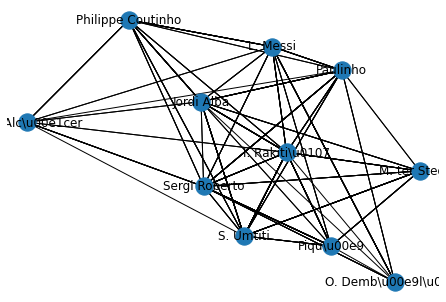

In [ ]:
import numpy as np
import networkx as nx
import pylab as plt

A = np.array(arr2)
temp = nx.MultiGraph()
G = nx.from_numpy_matrix(A, parallel_edges=True, create_using=temp)

mapping = {0: 'O. Demb\\u00e9l\\u00e9', 1: 'Paco Alc\\u00e1cer', 2: 'Philippe Coutinho', 3: 'Sergi Roberto', 4:'I. Rakiti\\u0107', 5:'Piqu\\u00e9', 6:'L. Messi', 7:'M. ter Stegen', 8:'S. Umtiti', 9:'Jordi Alba', 10:'Paulinho'}

H = nx.relabel_nodes(G, mapping)

nx.draw(H, with_labels = True) 

In [ ]:
def checkZones2(dataframe, columnName):
  resultSeries = pd.Series([])
  i = -1
  for index, row in dataframe.iterrows():
    x = (row[columnName])['x']
    y = (row[columnName])['y']
    index = i + 1
    resultSeries = resultSeries.append(pd.Series([int(((x // 33.3) * 5) + 1 + (y // 20))]), ignore_index=True)
  return resultSeries

In [ ]:
zoneSeries = checkZones2(playerNameSender2, 'Sender')
playerNameSenderZone = pd.concat([playerNameSender2, pd.DataFrame(zoneSeries)], axis=1, ignore_index=True)
playerNameSenderZone.rename(columns = {0:'PlayerName', 1:'EventSecond', 2:'EventName', 3:'SenderPosition', 4:'SenderZone'}, inplace = True) 
playerNameSenderZoneSorted = playerNameSenderZone.sort_values(by=['EventSecond'])
playerNameSenderZoneSorted.reset_index(drop=True, inplace=True)
playerNameSenderZoneSorted.head(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,PlayerName,EventSecond,EventName,SenderPosition,SenderZone
0,Paco Alc\u00e1cer,5.628892,Pass,"{'y': 49, 'x': 50}",8


In [ ]:
zoneSeries2 = checkZones2(playerNameRecepient, 'Recepient')
playerNameRecipientZone = pd.concat([playerNameRecepient, pd.DataFrame(zoneSeries2)], axis=1, ignore_index=True)
playerNameRecipientZone.rename(columns = {0:'PlayerName', 1:'EventSecond', 2:'RecipientPosition', 3:'Zone'}, inplace = True) 
playerNameRecipientZoneSorted = playerNameRecipientZone.sort_values(by=['EventSecond'])
playerNameRecipientZoneSorted = playerNameRecipientZoneSorted.reset_index(drop=True)
playerNameRecipientZoneSorted.head(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,PlayerName,EventSecond,RecipientPosition,Zone
0,Paco Alc\u00e1cer,5.628892,"{'y': 41, 'x': 40}",8


In [ ]:
receiverZoneSeries = playerNameRecipientZoneSorted.iloc[:,3]
recipientZoneDataframe = pd.DataFrame(receiverZoneSeries)
recipientZoneDataframe

passSenderReceiver = pd.concat([playerNameSenderZoneSorted, recipientZoneDataframe], axis=1)
passSenderReceiver.rename(columns = {'Zone':'ReceiverZone'}, inplace = True) 
passSenderReceiver.head(1)

,PlayerName,EventSecond,EventName,SenderPosition,SenderZone,ReceiverZone
0,Paco Alc\u00e1cer,5.628892,Pass,"{'y': 49, 'x': 50}",8,8


In [ ]:
rows, cols = (16, 16)
arr = [[0 for i in range(cols)] for j in range(rows)] 
i = 0
j = 0
for row in arr:
  j = 0 
  if(i==0):
    for j in range(cols):
      if(j>0):
        row[j] = j
      j += 1
  else:
     row[j] = i    
  i += 1
  
arr


[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [ ]:
# Filling 2D matrix of Barcelona team with corresponding passes

i = 0
j = 0
passCount = 0
for i in range(len(arr)):
  for j in range(len(arr[i])):
    passCount = 0
    if (i>0 and j>0):
      for index, row in passSenderReceiver.iterrows():
        if(row['SenderZone'] == arr[i][0] and arr[0][j] == row['ReceiverZone']):
          passCount += 1
      arr[i][j] = passCount    
    j += 1
  i += 1 

arr

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [1, 11, 12, 4, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [2, 10, 7, 21, 6, 3, 5, 5, 3, 1, 1, 0, 0, 0, 0, 0],
 [3, 7, 10, 11, 5, 10, 4, 1, 4, 6, 2, 0, 0, 0, 0, 0],
 [4, 2, 3, 8, 3, 13, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0],
 [5, 1, 4, 3, 9, 15, 0, 0, 1, 3, 5, 0, 0, 0, 0, 0],
 [6, 1, 1, 1, 1, 0, 7, 9, 0, 0, 0, 2, 6, 0, 0, 1],
 [7, 2, 5, 2, 0, 0, 5, 16, 6, 3, 0, 4, 4, 3, 1, 0],
 [8, 1, 2, 1, 2, 0, 2, 3, 9, 7, 2, 2, 4, 1, 2, 0],
 [9, 0, 1, 3, 3, 2, 2, 3, 7, 10, 7, 0, 0, 2, 3, 6],
 [10, 0, 0, 1, 2, 5, 0, 0, 1, 4, 9, 0, 0, 0, 1, 4],
 [11, 0, 1, 0, 0, 0, 1, 5, 1, 0, 0, 2, 3, 1, 0, 0],
 [12, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 6, 6, 4, 0, 0],
 [13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0],
 [14, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 2, 3, 4, 5],
 [15, 0, 0, 0, 0, 0, 0, 0, 1, 5, 2, 0, 1, 2, 5, 8]]

In [ ]:
import numpy as np

arr2 = np.arange(225).reshape(15,15)
for i in range(15):
  for j in range(15):
    if(i>0 and j>0):
      arr2[i-1][j-1] = int(arr[i][j])

arr2

array([[ 11,  12,   4,   0,   0,   6,   0,   0,   0,   0,   0,   0,   0,
          0,  14],
       [ 10,   7,  21,   6,   3,   5,   5,   3,   1,   1,   0,   0,   0,
          0,  29],
       [  7,  10,  11,   5,  10,   4,   1,   4,   6,   2,   0,   0,   0,
          0,  44],
       [  2,   3,   8,   3,  13,   0,   2,   2,   2,   2,   0,   0,   0,
          0,  59],
       [  1,   4,   3,   9,  15,   0,   0,   1,   3,   5,   0,   0,   0,
          0,  74],
       [  1,   1,   1,   1,   0,   7,   9,   0,   0,   0,   2,   6,   0,
          0,  89],
       [  2,   5,   2,   0,   0,   5,  16,   6,   3,   0,   4,   4,   3,
          1, 104],
       [  1,   2,   1,   2,   0,   2,   3,   9,   7,   2,   2,   4,   1,
          2, 119],
       [  0,   1,   3,   3,   2,   2,   3,   7,  10,   7,   0,   0,   2,
          3, 134],
       [  0,   0,   1,   2,   5,   0,   0,   1,   4,   9,   0,   0,   0,
          1, 149],
       [  0,   1,   0,   0,   0,   1,   5,   1,   0,   0,   2,   3,   1,
       

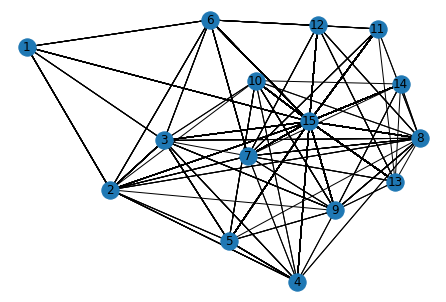

In [ ]:
import numpy as np
import networkx as nx
import pylab as plt

A = np.array(arr2)
temp = nx.MultiGraph()
G = nx.from_numpy_matrix(A, parallel_edges=True, create_using=temp)

mapping = {0: 1, 1: 2, 2: 3, 3: 4, 4:5, 5:6, 6:7, 7:8, 8:9, 9:10, 10:11, 11:12, 12:13, 13:14, 14:15}

H = nx.relabel_nodes(G, mapping)

nx.draw(H, with_labels = True) 